# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-11-24 23:00:00 +03:00`

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [76]:
!pip install xlrd

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [78]:
rev=r"C:\Users\Alexa\Downloads\reviews.tsv"

#db = pd.read_csv(rev, sep='\t', header=None)
reviews = pd.read_csv(rev, sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [81]:
X = reviews["review"]
y = reviews["sentiment"]
#display(X,y)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

In [7]:
#display(X_train, X_test)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [9]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_0=count_vectorizer.transform(X_train)
X_test_0=count_vectorizer.transform(X_test)
print(X_train_0.shape, X_test_0.shape)
#display(X_train_0)

(20000, 68482) (5000, 68482)


In [10]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_0=count_vectorizer.transform(X_train)
count_vectorizer.fit(X_test)
X_test_0=count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


In [85]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X)
X_train_0=count_vectorizer.transform(X_train)
X_test_0=count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


In [12]:
print(type(X_train_0))

<class 'scipy.sparse._csr.csr_matrix'>


Cамый логичный - последний подход. Mы посчитаем сразу все слова в 1 словарь, а не сделаем два разных словаря (с повторяющимися словами) для train и test. В первом подходе мы вообще теряем слова из X_test, которых нет в X_train.

**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those? 

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

*Answer:* тип - разреженная матрица. На каждый отзыв выделена одна строка, в которой лежит информация о словах, присутствующих в этом отзыве. Но в такой матрице много нулей, поэтому sparce matrix сжимает информацию, чтобы было удобнее хранить. Такие матрицы используются для данных, содержащих подсчёты.

Обычному матричному представлению они не соответствуют, к ним не применимы матричные функции в традиционном виде.


Разреженные матрицы могут быть представлены в разных видах:

-Sparse Row format.

-Sparse Column format. 

-List of Lists format

Разреженные матрицы хороши для:

-подсчётов (частоты слов в тексте)

-соответствий между данными (пользователь и просмотренные им фильмы на сайте, пользователь и купленные им товары в каталоге)

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [88]:
rf_model = RandomForestClassifier(n_estimators=500)
lr_model = LogisticRegression(max_iter=1e5)

In [89]:
from time import time

start = time()
rf_model.fit(X_train_0, y_train)
end = time()
print("it took {:.3f} seconds".format(end - start))


start = time()
lr_model.fit(X_train_0, y_train)
end = time()
print("it took {:.3f} seconds".format(end - start))

it took 341.807 seconds
it took 16.774 seconds


In [103]:
clf2 = LogisticRegression()
clf4 = RandomForestClassifier()

default_classifiers = [clf2,  clf4]

clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train_0, y_train)  
    pred = clf.predict(X_test_0)
    clf_predictions.append(pred)
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls =[recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions]
macro_precisions =[precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

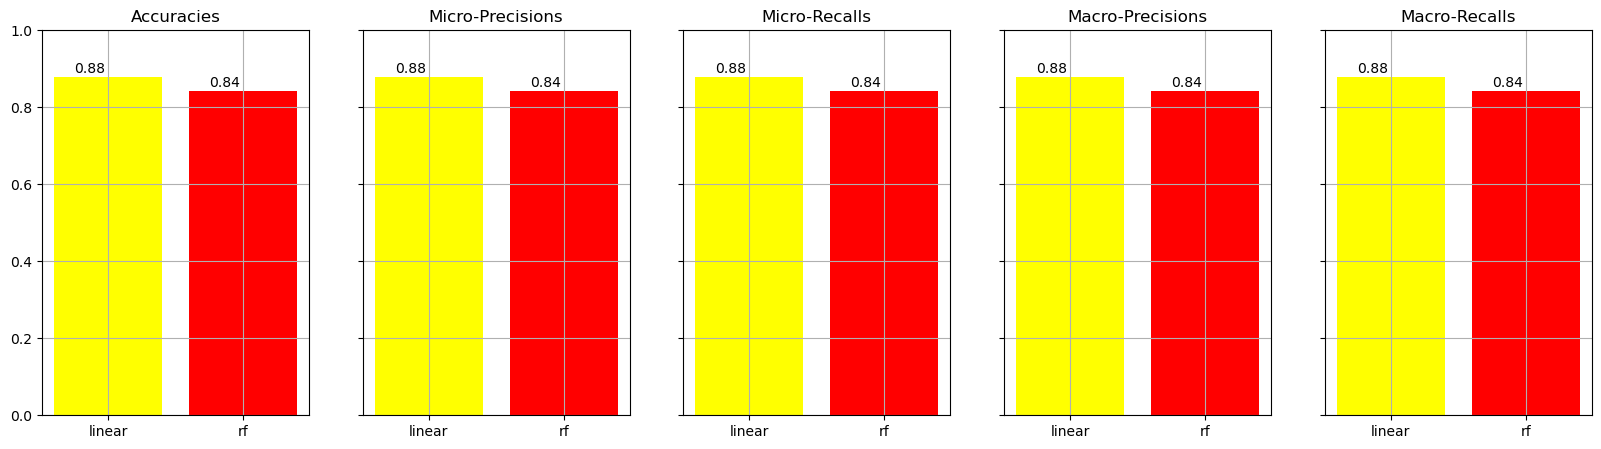

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["linear",  "rf"]
colors = ["yellow", "red"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

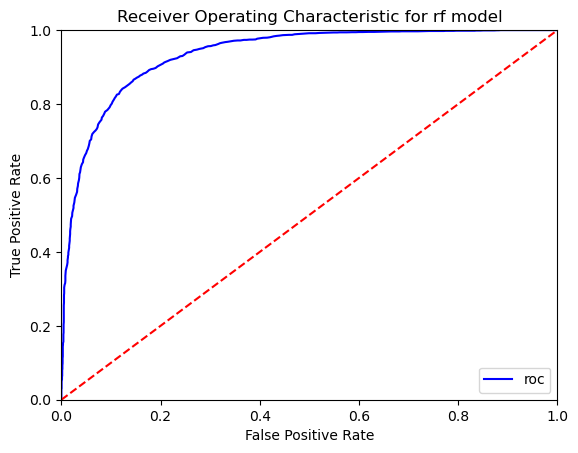

In [108]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
probs = rf_model.predict_proba(X_test_0)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for rf model')
plt.plot(fpr, tpr, 'b', label = 'roc' )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

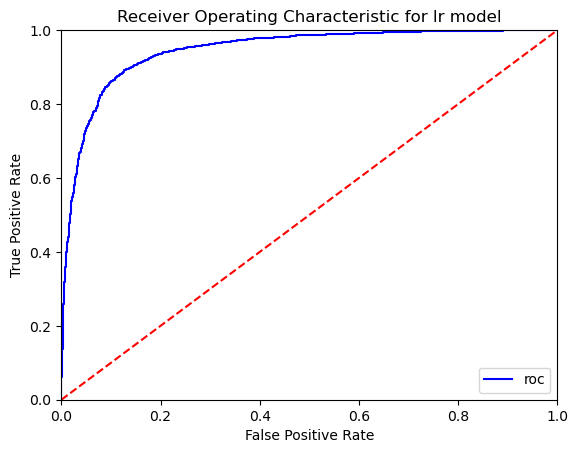

In [109]:
import sklearn.metrics as metrics
probs = lr_model.predict_proba(X_test_0)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for lr model')
plt.plot(fpr, tpr, 'b', label = 'roc' )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [100]:
predsrf = rf_model.predict_proba(X_test_0)[:, 1]
print('rf score: ', roc_auc_score(y_test, predsrf))

predslr = lr_model.predict_proba(X_test_0)[:, 1]
print('lr score: ', roc_auc_score(y_test, predslr))

rf score:  0.9350944000000001
lr score:  0.94512416


In [143]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
rf_precision, rf_recall, _ = precision_recall_curve(y_test, predsrf)
#print(y_test)
#print(predsrf)
#print(lr_model.predict(X_test_0))
rf_f1 = metrics.f1_score(y_test, rf_model.predict(X_test_0))

print('f1 for rf: ', rf_f1)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, predslr)
lr_f1 = metrics.f1_score(y_test, lr_model.predict(X_test_0))

print('f1 for lr: ' ,lr_f1)


f1 for rf:  0.8616352201257862
f1 for lr:  0.8827613568736361


Text(0, 0.5, 'Precision')

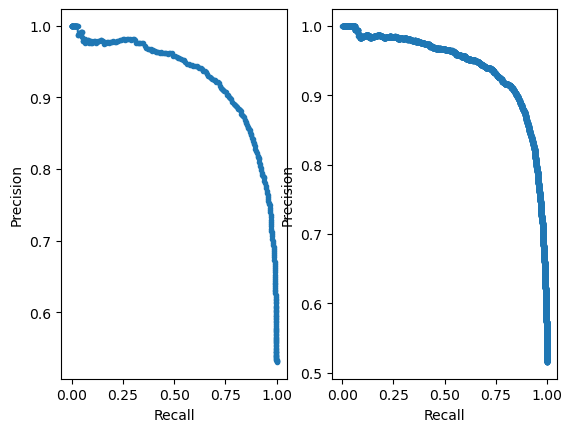

In [145]:
plt.subplot(1,2,1)
plt.plot(rf_recall, rf_precision, marker='.', label='RF')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1,2,2)
plt.plot(lr_recall, lr_precision, marker='.', label='LR')

plt.xlabel('Recall')
plt.ylabel('Precision')


In [155]:
print(y_test)
preds1=rf_model.predict(X_test_0)
print(preds1)
preds = rf_model.predict_proba(X_test_0)[:, 1]
print(preds)

6154     1
12433    1
17831    0
8131     0
5477     1
        ..
5268     1
15928    0
20485    0
13600    1
5615     1
Name: sentiment, Length: 5000, dtype: int64
[1 1 0 ... 0 1 1]
[0.656 0.612 0.416 ... 0.27  0.566 0.686]


In [166]:
my_y=y_test.to_numpy()
my_x=X_test.to_numpy()

<class 'pandas.core.series.Series'>


In [175]:
for i in range(0, 5000):
    if (my_y[i]==0):
        if(preds[i]>0.8):
            print(0, my_x[i])
    if (my_y[i]==1):
        if(preds[i]<0.24):
            print(1, my_x[i])

1 Who ever came up with story is one sick person. I rented it for our slumber party sleepover and all six of us got freaked out cause we're all in an acting class together, and we know a couple of the actors from class. Besides everybody screaming the whole freaky night, I had freaky nightmares. I kept thinking oh my God, if I get up to go to the bathroom to pee I'm going to be stabbed in the middle of wiping or something. I couldn't even go to the bathroom because we watched this gruesome horror movie. I also thought why are all the girls topless in this movie but we don't any of the boys units? You should make a horror film where the killer is a girl and chopping off units. I would watch that over and over. Call it hard or soft or something stupid like that. I'm only giving this movie a 9 because you FREAKED ME OUT FREAKS.
0 Essentially a story of man versus nature, this film has beautiful cinematography, the lush jungles of Ceylon and the presence of Elizabeth Taylor but the film re

Выведенные тексты - те, которые алгоритм сильнее всего мисклассифицировал. Первый принял за 0, так как в нём много сленга и отрицательных слов. Второй был принят за 1, так как в нём автор много хвалит визуальную картину, и вскользь упоминает, что сюжет ему не понравился. Третий и четвёртый отзыв хвалят фильмы за актёрский состав, так же вскользь упоминая минусы.

Мне кажется, что алгоритм чаще не угадывает отрицательные отзывы. В положительных отзывах люди пишут только плюсы, а в отрицательных - и плюсы и минусы

Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

*Answer:* линейная модель даёт лучшие результаты. Линейная модель лучше справляется с категориальными фичами. Она изначально построена, как работающая с векторами, а наши данные bow как раз вектора.

### More sophisticated feature prerocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [17]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

In [18]:
sum_words=X_train_0.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:20]
print(top20,"\n")

sum_words=X_test_0.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:20]
print(top20)

#https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

[('the', 269967), ('and', 131776), ('of', 116943), ('to', 108751), ('is', 86164), ('br', 81649), ('it', 77403), ('in', 75100), ('this', 61066), ('that', 58846), ('was', 38660), ('as', 37446), ('for', 35511), ('movie', 35508), ('with', 35478), ('but', 34063), ('film', 32347), ('on', 27555), ('you', 27493), ('not', 24519)] 

[('the', 66782), ('and', 32364), ('of', 28921), ('to', 26973), ('is', 21168), ('br', 20222), ('it', 19064), ('in', 18876), ('this', 14941), ('that', 14440), ('was', 9549), ('as', 9489), ('for', 8834), ('with', 8652), ('but', 8560), ('movie', 8539), ('film', 7812), ('you', 6774), ('on', 6647), ('not', 6113)]


Большинство из этих слов встречаются практически в любом тексте. Как и любые стоп-слова, они не несут особого смысла. Ещё есть film и movie, что логично, так как наши данные - отзывы к фильмам. Ещё есть br, это из <\br> - символа для оформления текста (перенос на другую строку?)

In [21]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Стоп слова - часто используемые слова, которые используются практически в каждом тексте. Контекст из них не понятен.

In [29]:
count_vectorizer2 = CountVectorizer(stop_words='english')
count_vectorizer2.fit(X)
count_vectorizer3 = CountVectorizer(stop_words='english')
count_vectorizer3.fit(X)
X_train_0_s=count_vectorizer2.transform(X_train)
X_test_0_s=count_vectorizer3.transform(X_test)

sum_words=X_train_0_s.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer2.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:20]
print(top20,"\n")

sum_words=X_test_0_s.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer3.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:20]
print(top20)

[('br', 81649), ('movie', 35508), ('film', 32347), ('like', 16287), ('just', 14205), ('good', 12015), ('time', 10146), ('story', 9599), ('really', 9437), ('people', 7501), ('bad', 7442), ('great', 7262), ('don', 7036), ('make', 6414), ('way', 6374), ('movies', 6262), ('think', 5855), ('characters', 5719), ('character', 5615), ('films', 5588)] 

[('br', 20222), ('movie', 8539), ('film', 7812), ('like', 3994), ('just', 3569), ('good', 3132), ('time', 2581), ('story', 2389), ('really', 2301), ('bad', 1866), ('don', 1812), ('great', 1798), ('people', 1786), ('way', 1652), ('make', 1611), ('think', 1442), ('characters', 1440), ('watch', 1421), ('character', 1409), ('movies', 1406)]


Стало значительно лучше. Теперь по этим словам можно понять, что в текстах речь идёт о фильмах

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

In [36]:
rev_g=reviews[reviews['sentiment']==1]
X = rev_g["review"]
y = rev_g["sentiment"]
#print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2500, random_state=42, stratify=y)
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(X)
X_train_a=count_vectorizer.transform(X)
X_test_a=count_vectorizer.transform(X_test)
sum_words=X_train_a .sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:100]
print(top20,"\n")

[('br', 49235), ('film', 20940), ('movie', 19078), ('like', 9040), ('good', 7724), ('just', 7154), ('story', 6779), ('time', 6516), ('great', 6419), ('really', 5475), ('people', 4480), ('best', 4320), ('love', 4302), ('life', 4203), ('way', 4037), ('films', 3813), ('think', 3655), ('movies', 3587), ('characters', 3559), ('character', 3516), ('don', 3485), ('man', 3463), ('watch', 3424), ('seen', 3415), ('little', 3342), ('make', 3303), ('does', 3069), ('know', 2833), ('did', 2790), ('years', 2756), ('end', 2696), ('real', 2568), ('scene', 2567), ('new', 2458), ('acting', 2438), ('plot', 2434), ('world', 2430), ('scenes', 2428), ('say', 2414), ('makes', 2390), ('better', 2382), ('work', 2346), ('young', 2343), ('10', 2324), ('ve', 2318), ('old', 2311), ('series', 2153), ('quite', 2143), ('cast', 2134), ('lot', 2088), ('actors', 2047), ('director', 2041), ('family', 2032), ('role', 1967), ('watching', 1966), ('funny', 1953), ('doesn', 1940), ('performance', 1930), ('bad', 1907), ('look',

In [37]:
rev_b=reviews[reviews['sentiment']==0]
X = rev_b["review"]
y = rev_b["sentiment"]
#print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2500, random_state=42, stratify=y)
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(X)
X_train_b=count_vectorizer.transform(X)
X_test_b=count_vectorizer.transform(X_test)
sum_words=X_train_b.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:100]
print(top20,"\n")

[('br', 52636), ('movie', 24969), ('film', 19219), ('like', 11241), ('just', 10620), ('good', 7423), ('bad', 7401), ('really', 6263), ('time', 6211), ('don', 5363), ('story', 5209), ('people', 4807), ('make', 4722), ('plot', 4155), ('movies', 4081), ('acting', 4056), ('way', 3989), ('think', 3642), ('characters', 3600), ('watch', 3550), ('character', 3508), ('did', 3507), ('better', 3358), ('know', 3334), ('seen', 3266), ('little', 3096), ('films', 3076), ('say', 2982), ('end', 2955), ('does', 2871), ('thing', 2866), ('ve', 2841), ('scene', 2816), ('scenes', 2785), ('didn', 2660), ('great', 2641), ('watching', 2640), ('doesn', 2611), ('man', 2516), ('worst', 2479), ('actually', 2450), ('actors', 2441), ('life', 2429), ('director', 2408), ('funny', 2337), ('going', 2319), ('look', 2247), ('old', 2215), ('real', 2168), ('love', 2151), ('horror', 2150), ('want', 2140), ('minutes', 2123), ('pretty', 2115), ('best', 2096), ('script', 2075), ('work', 2028), ('10', 2027), ('original', 1984), 

*Answer:* Топ-100 токенов для положительных и негативных отзывов очевидно разные. В положительных высокие места в топе занимают слова, несущие положительный характер: best, love, life, better, young. В отрицательных - отрицательный: bad, worst, awful, boring. При это какие-то общие слова (movie,film,like,good) встречаются в обоих топах.

**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [ ]:
#reviews

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

## Part 2. Word Embeddings [7 points]

In [176]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [177]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [178]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

In [179]:
import warnings
warnings.filterwarnings('ignore')

**Task 2.1 [1 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs, etc.

In [43]:
word_embeddings .most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7698540687561035),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594555974006653),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [44]:
word_embeddings .most_similar(positive=['he','herself'], negative=['she'])

[('himself', 0.9627846479415894),
 ('him', 0.8565483093261719),
 ('his', 0.747352659702301),
 ('myself', 0.7261638045310974),
 ('again', 0.7025265097618103),
 ('having', 0.6965805888175964),
 ('themselves', 0.6949114799499512),
 ('someone', 0.6896289587020874),
 ('put', 0.6893548965454102),
 ('once', 0.6852878928184509)]

In [45]:
word_embeddings .most_similar(positive=['slower', 'fast'], negative=['faster'])

[('slow', 0.7859700918197632),
 ('pace', 0.7750037908554077),
 ('brisk', 0.6425812840461731),
 ('slowing', 0.6136632561683655),
 ('trend', 0.5981132984161377),
 ('quick', 0.5874820351600647),
 ('bowler', 0.5865117311477661),
 ('start', 0.5829406380653381),
 ('steady', 0.5786635279655457),
 ('short', 0.578234851360321)]

In [46]:
word_embeddings .most_similar(positive=['cat', 'dogs'], negative=['dog'])

[('cats', 0.8701525926589966),
 ('animals', 0.7340957522392273),
 ('rabbits', 0.7251664996147156),
 ('rats', 0.7115925550460815),
 ('pets', 0.7050590515136719),
 ('monkeys', 0.6902256608009338),
 ('birds', 0.6901184320449829),
 ('pigs', 0.6574631333351135),
 ('elephants', 0.643221914768219),
 ('mice', 0.6377875804901123)]

In [47]:
word_embeddings .most_similar(positive=['mother', 'son'], negative=['father'])

[('daughter', 0.952526330947876),
 ('wife', 0.8872842788696289),
 ('sister', 0.8434263467788696),
 ('niece', 0.8197184205055237),
 ('husband', 0.8192030787467957),
 ('grandmother', 0.8175017237663269),
 ('daughters', 0.800868570804596),
 ('granddaughter', 0.798507034778595),
 ('cousin', 0.7935532331466675),
 ('brother', 0.7884622812271118)]

In [49]:
word_embeddings .most_similar(positive=['go', 'had'], negative=['have'])

[('went', 0.8594026565551758),
 ('going', 0.8331358432769775),
 ('back', 0.8258251547813416),
 ('then', 0.8079109191894531),
 ('just', 0.8039612770080566),
 ('out', 0.8004620671272278),
 ('got', 0.7936428785324097),
 ('did', 0.7932440042495728),
 ('get', 0.7915530204772949),
 ('again', 0.7851383090019226)]

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [65]:
#reviews
X=reviews['review']
#print(X)
y=reviews['sentiment']
#print(y)

In [181]:
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
X = reviews["review"]
y = reviews["sentiment"]
#print(X,y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2500, random_state=42, stratify=y)
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X)
X_train_b=count_vectorizer.transform(X)
X_test_b=count_vectorizer.transform(X_test)
sum_words=X_train_b.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top20=words_freq[0:20]
#print(top20,"\n")

In [70]:
print(len(words_freq))
print(words_freq[0])
print(type(words_freq[0][0]))
print(pos_tag([(words_freq[0][0])]))

74849
('the', 336749)
<class 'str'>
[('the', 'DT')]


In [71]:
basket = dict()
for x in range (0, len(words_freq)):
    b=pos_tag([(words_freq[x][0])])
    a=b[0][1]
    if(a=='PRP$'):
        a='PRPS'
    if(a=='WP$'):
        a='WPS'
    if ("%s" %(a)) in locals():
       # print(8)
        exec("%s = %s+%d" % (a,a,words_freq[x][1]))
        
        basket.update({ a : basket[a]+words_freq[x][1]})
    else:
        exec("%s = %d" % (a,words_freq[x][1]))
        basket.update({a: words_freq[x][1]})
#print(basket)

In [72]:
print(basket)

{'DT': 521244, 'CC': 226101, 'IN': 728599, 'TO': 135724, 'VBZ': 156530, 'NN': 1674687, 'PRP': 247347, 'VBD': 107723, 'RB': 406661, 'VBP': 32215, 'PRPS': 88065, 'VB': 146281, 'CD': 63834, 'WP': 38254, 'JJ': 311487, 'MD': 59120, 'RBR': 22657, 'WRB': 34798, 'WDT': 12783, 'VBN': 137084, 'NNS': 351510, 'JJS': 23852, 'VBG': 146835, 'JJR': 4170, 'WPS': 986, 'LS': 21, 'FW': 5}


In [73]:
{k: v for k, v in sorted(basket.items(), key=lambda item: item[1])}

{'FW': 5,
 'LS': 21,
 'WPS': 986,
 'JJR': 4170,
 'WDT': 12783,
 'RBR': 22657,
 'JJS': 23852,
 'VBP': 32215,
 'WRB': 34798,
 'WP': 38254,
 'MD': 59120,
 'CD': 63834,
 'PRPS': 88065,
 'VBD': 107723,
 'TO': 135724,
 'VBN': 137084,
 'VB': 146281,
 'VBG': 146835,
 'VBZ': 156530,
 'CC': 226101,
 'PRP': 247347,
 'JJ': 311487,
 'NNS': 351510,
 'RB': 406661,
 'DT': 521244,
 'IN': 728599,
 'NN': 1674687}

Чаще всего встречается существительное, на втором месте предлог, на третьем determiner (артикли и cлова типа that,this,all и т д)

Мне кажется, есть смысл давать большие веса существительным, глаголам и небольшие веса прилагательным и причастиям. Остальные части речи не несут большого смысла и служат скорее для удобного построения человеческой речи, поэтому есть смысл не давать им веса вообще.